In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
%matplotlib inline

In [138]:
df = pd.read_csv('local_sources_merged_data.csv')
df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
0,8.934884,7.242045,12.982558,6.586279,13.273659,6.411163,10.209070,14.338333,9.215349,6.340000,6.402326,4.683409,7.430000
1,5.954878,6.799512,13.728571,7.540244,10.280250,4.267955,4.356279,5.356512,4.063182,6.224500,5.368837,4.838372,3.262326
2,4.448140,2.694773,11.910714,13.314390,24.012558,1.830976,3.597273,2.866098,10.318605,3.879444,3.343488,6.137027,19.084634
3,5.203171,5.169767,14.332000,53.040000,170.213256,3.042857,4.408182,6.334146,12.268372,6.546389,7.072326,6.398108,9.672727
4,3.343659,2.775349,165.743864,36.889756,32.642791,4.583182,2.193864,10.488810,4.813023,7.841250,42.566744,10.502121,6.238140


In [139]:
my_array = df.to_numpy()
my_array

array([[ 8.93488372,  7.24204545, 12.98255814, ...,  6.40232558,
         4.68340909,  7.43      ],
       [ 5.95487805,  6.7995122 , 13.72857143, ...,  5.36883721,
         4.83837209,  3.26232558],
       [ 4.44813953,  2.69477273, 11.91071429, ...,  3.34348837,
         6.13702703, 19.08463415],
       ...,
       [19.92534884,  3.20883721, 22.26897436, ..., 10.59904762,
         9.02540541, 27.42137931],
       [21.52953488,  3.2897561 , 14.82046512, ..., 21.82878049,
        11.59255814, 24.80851852],
       [17.62302326,  5.12454545, 16.95674419, ..., 32.08595238,
        33.57733333, 18.25      ]])

In [140]:
def generate_cod(n, func_array):
    location = func_array
    location[:, n+1:] = (func_array[:, n+1:]-func_array[:, n][:, None])/(func_array[:, n+1:]+func_array[:, n][:, None])
    location = location[:, n+1:]**2
    COD = pd.DataFrame(np.sqrt(np.mean(location, axis=0)),
                      index= list(df.columns[n+1:]),
                      columns = [df.columns[n]])
    COD.to_csv('cods/local_sources/'+df.columns[n]+'_COD.csv')
    return COD

In [141]:
generate_cod(12, my_array)

,makindye_i


In [6]:
#Start from here tomorrow

In [23]:
merged_cod = pd.read_csv('cods/local_sources/merged_COD2.csv')
merged_cod.rename({'Unnamed: 0':''}, axis=1, inplace=True)
merged_cod.set_index('', inplace=True)
merged_cod.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000000,0.310132,0.427195,0.444823,0.431157,0.312891,0.313015,0.406936,0.397272,0.370978,0.442871,0.342989,0.346530
kansanga,0.310132,0.000000,0.472912,0.497541,0.478182,0.296550,0.253522,0.440706,0.448101,0.376557,0.478458,0.389456,0.362304
nansana_east,0.427195,0.472912,0.000000,0.347284,0.357573,0.409042,0.477720,0.379055,0.333311,0.406483,0.382625,0.351279,0.374915
lubaga,0.444823,0.497541,0.347284,0.000000,0.355869,0.442501,0.499603,0.385442,0.325606,0.423759,0.352989,0.352690,0.403901
nansana_west,0.431157,0.478182,0.357573,0.355869,0.000000,0.429018,0.479256,0.397384,0.347703,0.408572,0.417062,0.363656,0.387383


In [18]:
rounded_cod =merged_cod.round(decimals=3)
rounded_cod.to_csv('local_sources_coefficient_of_divergence.csv')
rounded_cod

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
,,,,,,,,,,,,,
nakasero_ii(2),0.000,0.310,0.427,0.445,0.431,0.313,0.313,0.407,0.397,0.371,0.443,0.343,0.347
kansanga,0.310,0.000,0.473,0.498,0.478,0.297,0.254,0.441,0.448,0.377,0.478,0.389,0.362
nansana_east,0.427,0.473,0.000,0.347,0.358,0.409,0.478,0.379,0.333,0.406,0.383,0.351,0.375
lubaga,0.445,0.498,0.347,0.000,0.356,0.443,0.500,0.385,0.326,0.424,0.353,0.353,0.404
nansana_west,0.431,0.478,0.358,0.356,0.000,0.429,0.479,0.397,0.348,0.409,0.417,0.364,0.387
lukuli(2),0.313,0.297,0.409,0.443,0.429,0.000,0.311,0.397,0.386,0.351,0.437,0.351,0.292
bugolobi,0.313,0.254,0.478,0.500,0.479,0.311,0.000,0.442,0.451,0.376,0.478,0.390,0.372
kyaliwajjala,0.407,0.441,0.379,0.385,0.397,0.397,0.442,0.000,0.359,0.390,0.391,0.355,0.388
seguku,0.397,0.448,0.333,0.326,0.348,0.386,0.451,0.359,0.000,0.366,0.361,0.324,0.357


In [21]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.savefig('local_sources_COD_heatmap.png')
    plt.show()
   

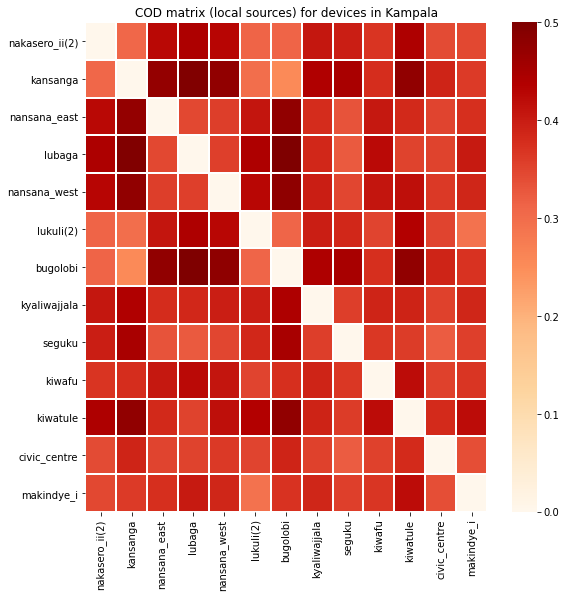

In [22]:
heat_map(rounded_cod, 'COD matrix (local sources) for devices in Kampala')